In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
from pathlib import Path
from matplotlib import colors
import zipfile

# SWESAR
* https://snowex-hackweek.github.io/website/tutorials/sar/swesarr.html

In [2]:
import os

os.chdir("..")

In [3]:
from omegaconf import OmegaConf
from metaearth.api import extract_assets
from metaearth.config import ConfigSchema

cfg = OmegaConf.load("config/nsidc-aso.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

# Constrain the test to only pull one item
for collection in cfg["collections"].keys():
    cfg["collections"][collection]["max_items"] = 1

successfully_extracted_assets, failed_assets = extract_assets(cfg)
print(
    f"Successfully extracted {len(successfully_extracted_assets)} assets. {len(failed_assets)} failed."
)

/opt/anaconda3/envs/metaearth/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
15:37:15 INFO - Extraction details for collection SNEX20_SWESARR_TB:
		provider=<EarthData Provider> 
		timerange=<2020-02-10/2020-02-12>,
		aoi_file=<config/aoi/conus-expanded.json>, 
		output_dir=<data/>,
		assets=<['all']>
15:37:15 INFO - 
EarthData Provider returned 1 items for SNEX20_SWESARR_TB for datetime 2020-02-10/2020-02-12

15:37:15 INFO - 2 assets have unknown file size
15:37:15 INFO - 2 assets to extract from 1 items
15:37:15 INFO - Asset types: 
key=data; description=""
key=metadata; description=""
15:37:15 INFO - Total asset size: 0 MB
15:37:15 INFO - Number of assets with unknown size: 2
15:37:16 INFO - Starting data extraction
15:37:16 INFO - 2 assets already exist, skipping
15:37:16 INFO - No assets to extract

Successfully extracted 0 assets. 0 failed.


In [4]:
fpath = "data/SNEX20_SWESARR_TB.v1/"
print(fpath)
files = glob.glob(fpath + "*")
file = files[0]

data/SNEX20_SWESARR_TB.v1/


In [5]:
datafiles = glob.glob(file + "/*.csv")[0]
data = pd.read_csv(datafiles)
lon = data["Longitude (deg)"]
lat = data["Latitude (deg)"]
print(data)

                           UTC  Longitude (deg)  Latitude (deg)  \
0     20200210-22:52:04.718500      -108.115052       39.014491   
1     20200210-22:52:04.818500      -108.115144       39.014491   
2     20200210-22:52:04.918500      -108.115237       39.014491   
3     20200210-22:52:05.018500      -108.115329       39.014491   
4     20200210-22:52:05.118500      -108.115422       39.014491   
...                        ...              ...             ...   
1253  20200210-22:54:10.221420      -108.212649       39.021992   
1254  20200210-22:54:10.321440      -108.212741       39.021992   
1255  20200210-22:54:10.421440      -108.212741       39.021992   
1256  20200210-22:54:10.521440      -108.212834       39.021992   
1257  20200210-22:54:10.621440      -108.212927       39.021992   

      Elevation (m)  TB X (K)  TB K (K)  TB Ka (K)  Antenna Longitude (deg)  \
0              3150     234.2     166.6       85.0              -108.052113   
1              3150     233.2     168

## Elevation Plot

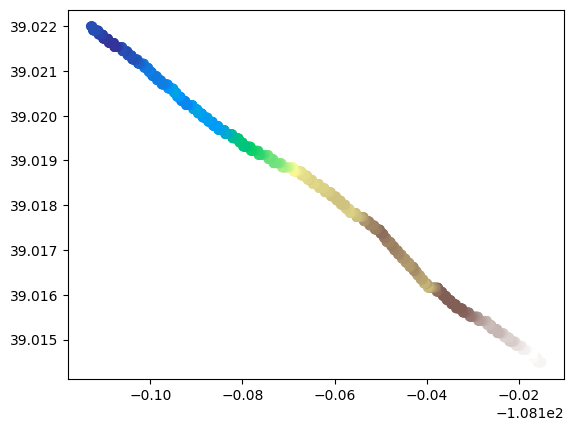

In [6]:
norm = colors.Normalize(vmin=2900, vmax=3200)
cmap = plt.get_cmap("terrain")
elevation = data["Elevation (m)"].values
plt.scatter(data["Longitude (deg)"], data["Latitude (deg)"], c=elevation, cmap=cmap)
plt.show()

## Radiometer plot

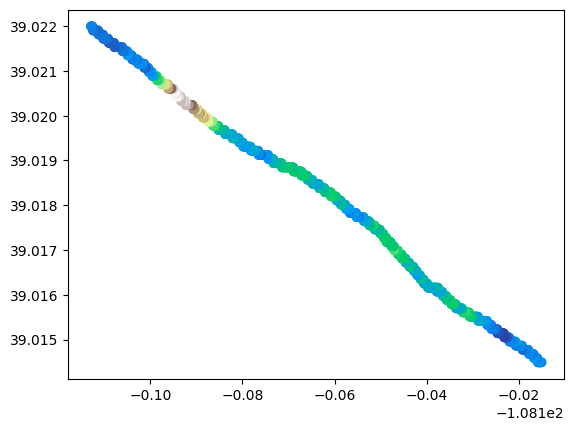

In [7]:
tb_ser = pd.Series(
    data["TB X (K)"].to_list()
    + data["TB K (K)"].to_list()
    + data["TB Ka (K)"].to_list(),
    name="Tb",
)
data["tb"] = tb_ser
plt.scatter(
    data["Longitude (deg)"], data["Latitude (deg)"], c=data["tb"].values, cmap=cmap
)
plt.show()

# UAVSAR
*  https://snowex-hackweek.github.io/website/tutorials/sar/uavsar.html#opening-and-plotting-the-raw-uavsar-raster-files

In [8]:
import rasterio as rio
from rasterio.plot import show  # plotting raster data
from rasterio.plot import show_hist  # histograms of raster data

In [9]:
cfg = OmegaConf.load("config/UAVSAR.yaml")
cfg_schema = OmegaConf.structured(ConfigSchema)
cfg = OmegaConf.merge(cfg_schema, cfg)

# Constrain the test to only pull one item
for collection in cfg["collections"].keys():
    cfg["collections"][collection]["max_items"] = 1

successfully_extracted_assets, failed_assets = extract_assets(cfg)
print(
    f"Successfully extracted {len(successfully_extracted_assets)} assets. {len(failed_assets)} failed."
)

15:37:22 INFO - Extraction details for collection UAVSAR_INSAR_INT_GRD:
		provider=<EarthData Provider> 
		timerange=<2021-03-10/2021-03-21>,
		aoi_file=<config/aoi/conus-expanded.json>, 
		output_dir=<data>,
		assets=<['all']>
15:37:23 INFO - 
EarthData Provider returned 1 items for UAVSAR_INSAR_INT_GRD for datetime 2021-03-10/2021-03-21

15:37:23 INFO - Extraction details for collection UAVSAR_INSAR_AMP_GRD:
		provider=<EarthData Provider> 
		timerange=<2021-03-10/2021-03-21>,
		aoi_file=<config/aoi/conus-expanded.json>, 
		output_dir=<data>,
		assets=<['all']>
15:37:23 INFO - 
EarthData Provider returned 1 items for UAVSAR_INSAR_AMP_GRD for datetime 2021-03-10/2021-03-21

15:37:23 INFO - 6 assets have unknown file size
15:37:23 INFO - 6 assets to extract from 1 items
15:37:23 INFO - Asset types: 
key=data; description=""
key=browse; description=""
key=metadata; description=""
15:37:23 INFO - Total asset size: 0 MB
15:37:23 INFO - Number of assets with unknown size: 6
15:37:23 INFO -

Successfully extracted 0 assets. 0 failed.


## Post process and plot

Following code cells are used to unzip the data, transform to tiff file and plot. GDAL is required to transform the file. 

In [10]:
# folder is path to a folder with an .ann (or .txt) and .grd files (.amp1, .amp2, .cor, .unw, .int)
import codecs
import re


def uavsar_tiff_convert(folder):
    """
    Builds a header file for the input UAVSAR .grd file,
    allowing the data to be read as a raster dataset.
    :param folder:   the folder containing the UAVSAR .grd and .ann files
    """

    os.chdir(folder)
    int_file = glob.glob(os.path.join(folder, "int.grd"))

    # Empty lists to put information that will be recalled later.
    Lines_list = []
    Samples_list = []
    Latitude_list = []
    Longitude_list = []
    Files_list = []

    # Step 1: Look through folder and determine how many different flights there are
    # by looking at the HDR files.
    for files in os.listdir(folder):
        if files[-4:] == ".grd":
            newfile = open(files[0:-4] + ".hdr", "w")
            newfile.write(
                """ENVI
description = {DESCFIELD}
samples = NSAMP
lines = NLINE
bands = 1
header offset = 0
data type = DATTYPE
interleave = bsq
sensor type = UAVSAR L-Band
byte order = 0
map info = {Geographic Lat/Lon, 
            1.000, 
            1.000, 
            LON, 
            LAT,  
            0.0000555600000000, 
            0.0000555600000000, 
            WGS-84, units=Degrees}
wavelength units = Unknown
                """
            )
            newfile.close()
            if files[0:18] not in Files_list:
                Files_list.append(files[0:18])

    # Variables used to recall indexed values.
    var1 = 0

    # Step 2: Look through the folder and locate the annotation file(s).
    # These can be in either .txt or .ann file types.
    for files in os.listdir(folder):
        if Files_list[var1] and files[-4:] == ".txt" or files[-4:] == ".ann":
            # Step 3: Once located, find the info we are interested in and append it to
            # the appropriate list. We limit the variables to <=1 so that they only
            # return two values (one for each polarization of
            searchfile = codecs.open(files, encoding="windows-1252", errors="ignore")
            for line in searchfile:
                if "Ground Range Data Latitude Lines" in line:
                    Lines = line[65:70]
                    print(f"Number of Lines: {Lines}")
                    if Lines not in Lines_list:
                        Lines_list.append(Lines)

                elif "Ground Range Data Longitude Samples" in line:
                    Samples = line[65:70]
                    print(f"Number of Samples: {Samples}")
                    if Samples not in Samples_list:
                        Samples_list.append(Samples)

                elif "Ground Range Data Starting Latitude" in line:
                    Latitude = line[65:85]
                    print(f"Top left lat: {Latitude}")
                    if Latitude not in Latitude_list:
                        Latitude_list.append(Latitude)

                elif "Ground Range Data Starting Longitude" in line:
                    Longitude = line[65:85]
                    print(f"Top left Lon: {Longitude}")
                    if Longitude not in Longitude_list:
                        Longitude_list.append(Longitude)

            # Reset the variables to zero for each different flight date.
            var1 = 0
            searchfile.close()

    # Step 3: Open .hdr file and replace data for all type 4 (real numbers) data
    # this all the .grd files expect for .int
    for files in os.listdir(folder):
        if files[-4:] == ".hdr":
            with open(files, "r") as sources:
                lines = sources.readlines()
            with open(files, "w") as sources:
                for line in lines:
                    if "data type = DATTYPE" in line:
                        sources.write(re.sub(line[12:19], "4", line))
                    elif "DESCFIELD" in line:
                        sources.write(re.sub(line[15:24], folder, line))
                    elif "lines" in line:
                        sources.write(re.sub(line[8:13], Lines, line))
                    elif "samples" in line:
                        sources.write(re.sub(line[10:15], Samples, line))
                    elif "LAT" in line:
                        sources.write(re.sub(line[12:15], Latitude, line))
                    elif "LON" in line:
                        sources.write(re.sub(line[12:15], Longitude, line))
                    else:
                        sources.write(re.sub(line, line, line))

    # Step 3: Open .hdr file and replace data for .int file date type 6 (complex)
    for files in os.listdir(folder):
        if files[-8:] == ".int.hdr":
            with open(files, "r") as sources:
                lines = sources.readlines()
            with open(files, "w") as sources:
                for line in lines:
                    if "data type = 4" in line:
                        sources.write(re.sub(line[12:13], "6", line))
                    elif "DESCFIELD" in line:
                        sources.write(re.sub(line[15:24], folder, line))
                    elif "lines" in line:
                        sources.write(re.sub(line[8:13], Lines, line))
                    elif "samples" in line:
                        sources.write(re.sub(line[10:15], Samples, line))
                    elif "LAT" in line:
                        sources.write(re.sub(line[12:15], Latitude, line))
                    elif "LON" in line:
                        sources.write(re.sub(line[12:15], Longitude, line))
                    else:
                        sources.write(re.sub(line, line, line))

    # Step 4: Now we have an .hdr file, the data is geocoded and can be loaded into python with rasterio
    # once loaded in we use gdal.Translate to convert and save as a .tiff

    data_to_process = glob.glob(os.path.join(folder, "*.grd"))  # list all .grd files
    for (
        data_path
    ) in (
        data_to_process
    ):  # loop to open and translate .grd to .tiff, and save .tiffs using gdal
        raster_dataset = gdal.Open(data_path, gdal.GA_ReadOnly)
        raster = gdal.Translate(
            os.path.join(folder, os.path.basename(data_path) + ".tiff"),
            raster_dataset,
            format="Gtiff",
            outputType=gdal.GDT_Float32,
        )

    # Step 5: Save the .int raster, needs separate save because of the complex format
    data_to_process = glob.glob(
        os.path.join(folder, "*.int.grd")
    )  # list all .int.grd files (only 1)
    for data_path in data_to_process:
        raster_dataset = gdal.Open(data_path, gdal.GA_ReadOnly)
        raster = gdal.Translate(
            os.path.join(folder, os.path.basename(data_path) + ".tiff"),
            raster_dataset,
            format="Gtiff",
            outputType=gdal.GDT_CFloat32,
        )

    print(".tiffs have been created")
    return

In [11]:
POST_PLOT = False
if POST_PLOT:
    from osgeo import gdal
    
    fpath = "data/UAVSAR_INSAR_AMP_GRD.v1/"
    print(fpath)
    files = glob.glob(fpath + "*")
    file = files[0]
    print(file)
    file = glob.glob(file + "/*")[0]
    print(file)
    folder = Path(file).parent.absolute()
    with zipfile.ZipFile(file, "r") as zip_ref:
        zip_ref.extractall(folder)
    # data_path = "/Users/shihengduan/metaearth/data/UAVSAR_INSAR_AMP_GRD.v1/UA_rockmt_32109_21015-004_21017-013_0007d_s01_L090_01-AMPLITUDE_GRD/rockmt_32109_21015-004_21017-013_0007d_s01_L090_01_amp_grd/"
    uavsar_tiff_convert(str(folder))
    for amp1 in glob.glob(str(folder) + "/*amp1.grd.tiff"):
        print(amp1)

    # amplitude from the second acquisition
    for amp2 in glob.glob(str(folder) + "/*amp2.grd.tiff"):
        print(amp2)

    # coherence
    for cor in glob.glob(str(folder) + "/*cor.grd.tiff"):
        print(cor)

    # unwrapped phase
    for unw in glob.glob(str(folder) + "/*unw.grd.tiff"):
        print(unw)

    # dem used in processing
    for dem in glob.glob(str(folder) + "/*hgt.grd.tiff"):
        print(dem)
    amp1_rast = rio.open(amp1)
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title("Amplitude 1", fontsize=16)
    show((amp1_rast, 1), cmap="Blues", vmin=0, vmax=1)